# 1. 다항 회귀분석 (Polynomial Regression)
* 다항식을 사용한 선형 회귀

## 1-2. 학습시간에 따른 성적 예측

### 1) 문제정의
학습시간에 따른 성적 예측하기

### 2) 데이터 수집
* https://www.kaggle.com/shubham47/students-score-dataset-linear-regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ori_data = pd.read_csv('data/01_student_score/student_scores.csv')
data = ori_data.copy()
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 3) 데이터 전처리
* 결측치 처리

In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### 4) 데이터 탐색
* 상관관계
* 산점도(Scatter Plot)

In [6]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


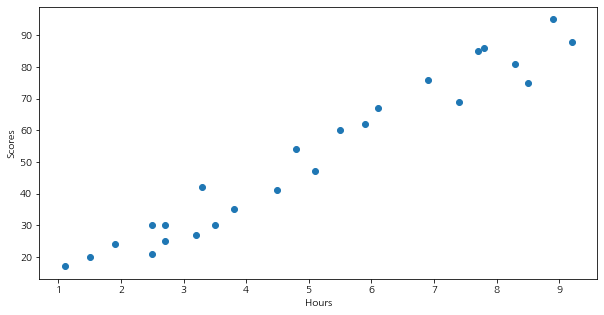

In [7]:
plt.figure(figsize=(10, 5))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(data.Hours, data.Scores)
plt.show()

### 5) 모델 학습
* 데이터 쪼개기
* 선형회귀 학습
* 선형회귀 예측

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
# 입력데이터(독립변수) : Height (2차원)
# 타겟데이터(종속변수) : Weight (1차원)
input_data = data[['Hours']].to_numpy()
target_data = data['Scores'].to_numpy()
input_data, target_data

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test

(array([[7.8],
        [6.9],
        [1.1],
        [5.1],
        [7.7],
        [3.3],
        [8.3],
        [9.2],
        [6.1],
        [3.5],
        [2.7],
        [5.5],
        [2.7],
        [8.5],
        [2.5],
        [4.8],
        [8.9],
        [4.5]]),
 array([[1.5],
        [3.2],
        [7.4],
        [2.5],
        [5.9],
        [3.8],
        [1.9]]),
 array([86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95,
        41], dtype=int64),
 array([20, 27, 69, 30, 62, 35, 24], dtype=int64))

In [11]:
# Hours를 제곱한 항 추가
X_train_poly = np.column_stack((X_train ** 2, X_train))
X_test_poly = np.column_stack((X_test ** 2, X_test))
X_train_poly, X_test_poly

(array([[60.84,  7.8 ],
        [47.61,  6.9 ],
        [ 1.21,  1.1 ],
        [26.01,  5.1 ],
        [59.29,  7.7 ],
        [10.89,  3.3 ],
        [68.89,  8.3 ],
        [84.64,  9.2 ],
        [37.21,  6.1 ],
        [12.25,  3.5 ],
        [ 7.29,  2.7 ],
        [30.25,  5.5 ],
        [ 7.29,  2.7 ],
        [72.25,  8.5 ],
        [ 6.25,  2.5 ],
        [23.04,  4.8 ],
        [79.21,  8.9 ],
        [20.25,  4.5 ]]),
 array([[ 2.25,  1.5 ],
        [10.24,  3.2 ],
        [54.76,  7.4 ],
        [ 6.25,  2.5 ],
        [34.81,  5.9 ],
        [14.44,  3.8 ],
        [ 3.61,  1.9 ]]))

In [12]:
# LinearRegression : 선형회귀 알고리즘을 구현한 클래스
# fit() : 학습, score() : 평가, predict() : 예측
lr = LinearRegression()

In [13]:
# 선형 회귀 모델 학습
lr.fit(X_train_poly, y_train)

LinearRegression()

In [14]:
lr.coef_, lr.intercept_

(array([-0.12755471, 11.33067045]), -1.0757331963049879)

In [15]:
# 선형 회귀 모델 예측
lr.predict([[8 ** 2, 8]])

array([81.40612877])

In [16]:
# Weight = a * Height^2 + b * Height + c
-0.12755471 * 8 ** 2 + 11.33067045 * 8 -1.0757331963049879

81.40612896369501

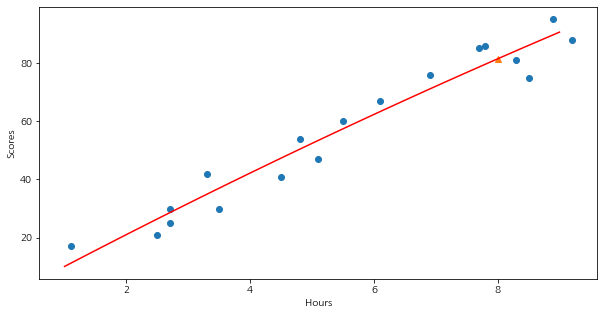

In [21]:
point = np.linspace(1, 9, 30)

plt.figure(figsize=(10, 5))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(X_train, y_train)
plt.plot(point, -0.127 * point ** 2 + 11.33 * point -1.075, color='r')
plt.scatter(8, 81.406, marker='^')
plt.show()

In [22]:
### 6) 모델 평가
y_pred = lr.predict(X_test_poly)
pd.DataFrame({'Hour': X_test[:,0], 'Actual Score': y_test, 'Predicted Score': y_pred})

,Hour,Actual Score,Predicted Score
0,1.5,20,15.633274
1,3.2,27,33.876252
2,7.4,69,75.786332
3,2.5,30,26.453726
4,5.9,62,61.335043
5,3.8,35,40.138924
6,1.9,24,19.992068


In [23]:
lr.score(X_train_poly, y_train)  # 훈련세트

0.9491324385216541

In [24]:
lr.score(X_test_poly, y_test)  # 테스트 세트

0.9254080931374671

In [20]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.9367661043365055

In [21]:
y_pred2 = lr.predict(X_train)
metrics.r2_score(y_train, y_pred2)

0.9484509249326872

In [22]:
# R-Squared(결정계수), Adj R-Squared(수정된 결정계수)

### 7) 결과 해석 및 문제해결방안 도출
* 훈련세트와 테스트세트 모두 높지 않음
* 과소적합이 되었다고 볼 수 있음
* 직선형태이므로 입력값에 따라 Weight와 Score가 음수인 결과가 나올 수 있음